In [12]:
import re

### 예제파일 가져오기
koNLPy corpus에서 대한민국헌법 텍스트 파일을 로드

In [10]:
with open("애국가.txt", "r") as file:
    text = file.read()

In [46]:
# \n을 " "로 변환시켜줌
c = re.sub("\n", "", text)

In [16]:
print(type(c)) #가져온 데이터의 type을 확인
print(len(c))

<class 'str'>
254


In [18]:
#word로 tokenize
from nltk.tokenize import word_tokenize
c_words = word_tokenize(c)
len(c_words)

47

In [19]:
" ".join(c_words)

'동해물과 백두산이 마르고 닳도록하느님이 보우하사 우리나라만세무궁화 삼천리 화려강산 대한사람 대한으로 길이 보전하세남산위에 저 소나무 철갑을 두른듯바람서리 불변함은 우리기상 일세무궁화 삼천리 화려강산 대한사람 대한으로 길이보전하세가을하늘 공활한데 높고 구름없이 밝은달은 우리가슴 일편단심일세무궁화 삼천리 화려강산 대한사람 대한으로 길이보전하세이 기상과 이 맘으로 충성을 다하여괴로우나 즐거우나 나라사랑하세무궁화 삼천리 화려강산 대한사람 대한으로 길이보전하세'

In [20]:
from konlpy.tag import Okt
okt = Okt()
tokens_c = okt.morphs(c) #형태소 단위로 tokenize

C:\Users\User\Anaconda3\lib\site-packages\jpype\_core.py:218: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [21]:
len(tokens_c)

103

In [22]:
type(tokens_c)

list

In [23]:
" ".join(tokens_c)

'동 해물 과 백두산 이 마르고 닳도록 하느님 이 보우 하사 우리나라 만세 무궁화 삼천리 화려 강산 대한 사람 대한 으로 길이 보전 하세 남산 위 에 저 소나무 철갑 을 두른듯 바람 서리 불변 함 은 우리 기상 일세 무궁화 삼천리 화려 강산 대한 사람 대한 으로 길이 보전 하세가을 하늘 공 활 한 데 높고 구름 없이 밝은 달 은 우리 가슴 일편단심 일세 무궁화 삼천리 화려 강산 대한 사람 대한 으로 길이 보전 하 세이 기상 과 이 맘 으로 충성 을 다 하여 괴로우나 즐거우나 나라 사랑 하세 무궁화 삼천리 화려 강산 대한 사람 대한 으로 길이 보전 하세'

### nltk의 Text class를 이용하여 다양한 기능을 수행
http://www.nltk.org/_modules/nltk/text.html

https://www.nltk.org/book/ch01.html

In [25]:
import nltk
c_nltk_text = nltk.Text(tokens_c, name = "애국가") #tokens_c 대신 c를 쓰면 어떻게 될까?
c_nltk_text

<Text: 애국가>

In [26]:
# 모든 단어의 수
print(len(c_nltk_text.tokens))
# 서로 다른 단어의 수
print(len(set(c_nltk_text.tokens)))

103
61


In [27]:
#단어와 단어의 빈도를 dictionary 형태로 표현 
c_nltk_text.vocab()

FreqDist({'대한': 8, '으로': 5, '무궁화': 4, '삼천리': 4, '화려': 4, '강산': 4, '사람': 4, '길이': 4, '보전': 4, '이': 3, ...})

#### 그림을 그리기 전 한글폰트를 설정

In [49]:
from matplotlib import font_manager, rc
from matplotlib import pyplot as plt
plt.style.use("ggplot")
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

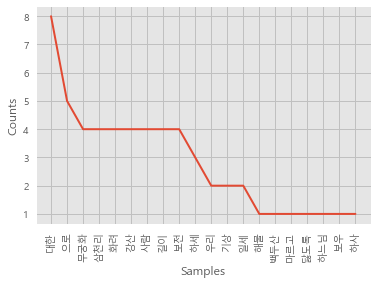

In [50]:
#상위 빈도 단어들의 빈도를 그래프로 출력
%matplotlib inline
c_nltk_text.plot(20)

문제점: 의미 없는 단어나 특수문자가 많으므로 정제가 필요

In [31]:
tokens_new = []
for token in tokens_c:
    if len(token.strip()) > 1: # 스페이스를 제외한 나머지 문자열의 길이가 둘 이상인 단어만 포함
        tokens_new.append(token.strip())
print(len(tokens_new))

81


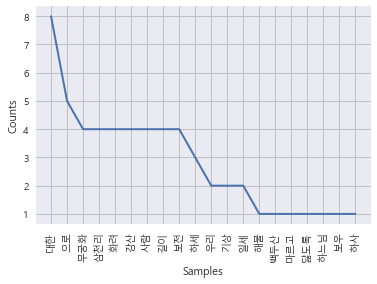

In [33]:
plt.style.use("seaborn")
c_nltk_text = nltk.Text(tokens_new, name = "애국가")
c_nltk_text.plot(20)

In [38]:
#특정한 단어의 빈도를 알고 싶다면
c_nltk_text.count('대한')

8

### context를 보는 방법
concordance(): 주어진 단어를 중심으로 앞 뒤의 단어들을 보여 줌

In [40]:
c_nltk_text.concordance('보전')

Displaying 4 of 4 matches:
 우리나라 만세 무궁화 삼천리 화려 강산 대한 사람 대한 으로 길이 보전 하세 남산 소나무 철갑 두른듯 바람 서리 불변 우리 기상 일세 무궁
우리 기상 일세 무궁화 삼천리 화려 강산 대한 사람 대한 으로 길이 보전 하세가을 하늘 높고 구름 없이 밝은 우리 가슴 일편단심 일세 무궁화
 일편단심 일세 무궁화 삼천리 화려 강산 대한 사람 대한 으로 길이 보전 세이 기상 으로 충성 하여 괴로우나 즐거우나 나라 사랑 하세 무궁화
나라 사랑 하세 무궁화 삼천리 화려 강산 대한 사람 대한 으로 길이 보전 하세


collocation is a sequence of words that occur together unusually often.

In [42]:
nltk.download('stopwords')
# 함께 많이 나타난 단어들을 출력
c_nltk_text.collocations()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


무궁화 삼천리


[nltk_data]   Unzipping corpora\stopwords.zip.


### 명사만 추출해서 처리하기
kkma와 Twitter 비교

In [44]:
nc = okt.nouns(c) #nouns_constitution
print(len(nc))
print(" ".join(nc))

70
해물 백두산 마르고 하느님 보우 하사 우리나라 만세 무궁화 삼천리 화려 강산 대한 사람 대한 길이 보전 남산 위 저 소나무 철갑 바람 서리 불변 함 우리 기상 무궁화 삼천리 화려 강산 대한 사람 대한 길이 보전 하늘 활 데 구름 달 우리 가슴 일편단심 무궁화 삼천리 화려 강산 대한 사람 대한 길이 보전 세이 기상 이 맘 충성 나라 사랑 무궁화 삼천리 화려 강산 대한 사람 대한 길이 보전


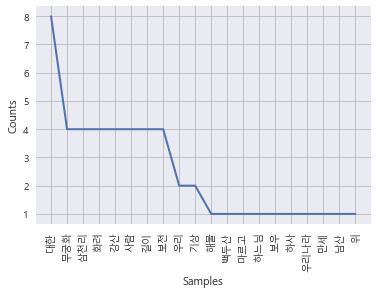

In [45]:
ncnt = nltk.Text(nc, name = "Okt명사")
ncnt.plot(20)